In [14]:
%%markdown

Visualizing Seattle Bicycle Counts. The data is from a bicycle counter installed with inductive sensors on the east and west sidewalks. We are going to use the Fremont_Bridge_Bicycle_Counter.csv dataset.


Visualizing Seattle Bicycle Counts. The data is from a bicycle counter installed with inductive sensors on the east and west sidewalks. We are going to use the Fremont_Bridge_Bicycle_Counter.csv dataset.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

%matplotlib inline

In [16]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head(10)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


In [17]:
# Let's shorten the column names for convinience.
data.columns = ['Total','West', 'East']
data.head(10)

,Total,West,East
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0
2019-11-01 05:00:00,20.0,9.0,11.0
2019-11-01 06:00:00,97.0,43.0,54.0
2019-11-01 07:00:00,299.0,120.0,179.0
2019-11-01 08:00:00,583.0,261.0,322.0


In [18]:
# Summary statistics for this data
data.dropna().describe()

,Total,West,East
count,140680.000000,140680.000000,140680.000000
mean,111.245472,50.666001,60.579471
std,142.190544,65.559949,88.412836
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


In [19]:
shape = data.shape

print('The shape of the dataset is:', shape)
info = data.info()

The shape of the dataset is: (140702, 3)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140702 entries, 2019-11-01 00:00:00 to 2021-03-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   140680 non-null  float64
 1   West    140680 non-null  float64
 2   East    140680 non-null  float64
dtypes: float64(3)
memory usage: 4.3 MB


Text(0, 0.5, 'Hourly Bicycle count')

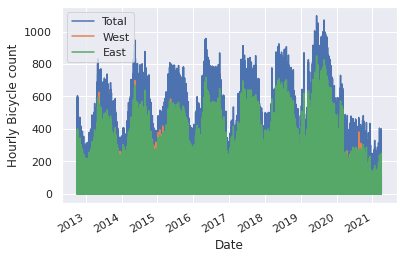

In [20]:
# Let's Visualize the data
data.plot()
plt.ylabel('Hourly Bicycle count')

In [21]:
%%markdown
 It is still hard to get insights from the visualization, Let's try resampling the data to a coaster grid by week

 It is still hard to get insights from the visualization, Let's try resampling the data to a coaster grid by week


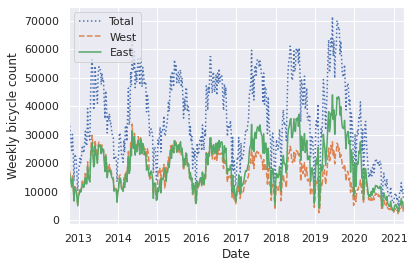

In [22]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--','-'])
plt.ylabel('Weekly bicycle count');

In [23]:
%%markdown
It's now easier to get insights from the data since we can see the trends clearly. 

It's now easier to get insights from the data since we can see the trends clearly. 


Text(0, 0.5, 'Mean Hourly Count')

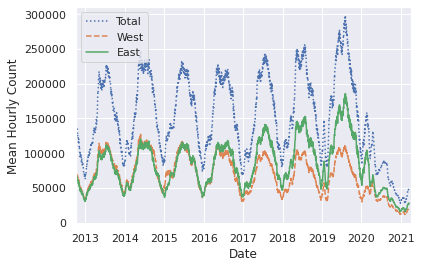

In [24]:
# Let's now do a 30-day rolling mean of our data
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean Hourly Count')

<AxesSubplot:xlabel='time'>

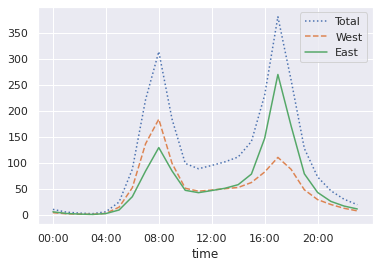

In [25]:
# Let's visualize the average traffic as a function of the time of the day
by_time = data.groupby(data.index.time).mean()
hourly = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly, style=[':', '--', '-'])

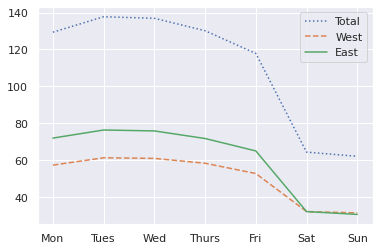

In [26]:
# Let's visualize the average traffic time as a function of the day of the week
by_day = data.groupby(data.index.dayofweek).mean()
by_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_day.plot(style=[':', '--', '-']);

In [27]:
# Let's now group the days according weekdays and weekends.
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

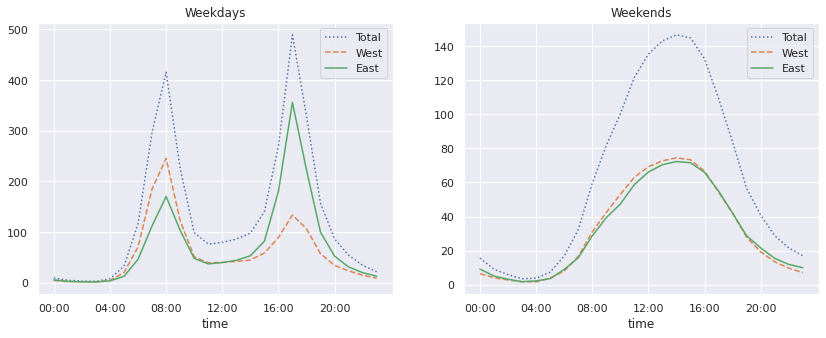

In [28]:
# Now we'll plot the weekdays/weekends trends.
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly, style=[':', '--', '-']);